In [1]:
import sys
sys.path.insert(1, '../../unseen')
import warnings
warnings.filterwarnings('ignore')

import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns

import array_handling
import fileio

In [2]:
infile = '/g/data/xv83/dbi599/seatac/tasmax_cafe-c5-d60-pX-f6_19900501-20201101_A-DEC-max_seatac.zarr.zip'

In [3]:
ds = xr.open_zarr(infile)

In [4]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) datetime64[ns] dask.array<chunksize=(9, 62), meta=np.ndarray>
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 dask.array<chunksize=(1, 9, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [5]:
ds_time = array_handling.reindex_forecast(ds)

In [6]:
ds_time

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, time: 78)
Coordinates:
  * time       (time) datetime64[ns] 1991-05-01 1991-11-01 ... 2029-11-01
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
    lead_time  (init_date, time) float64 0.0 nan 1.0 nan 2.0 ... nan 7.0 nan 8.0
Data variables:
    tasmax     (init_date, time, ensemble) float32 dask.array<chunksize=(1, 78, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [7]:
ds_time['tasmax'].isel({'ensemble': 0, 'init_date': 0}).values

array([28.803467,       nan, 36.737823,       nan, 27.867218,       nan,
       33.875732,       nan, 26.35556 ,       nan, 32.003784,       nan,
       33.724243,       nan, 27.360626,       nan, 39.443665,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)

In [8]:
max_by_year = ds_time['tasmax'].max(dim=('ensemble', 'init_date'), keep_attrs=True)
max_by_year = max_by_year.resample(time='A-DEC').max('time', keep_attrs=True)

In [9]:
max_by_year.values

array([41.887207, 40.687317, 42.165253, 42.830505, 42.770416, 44.441315,
       45.343353, 43.194   , 44.46515 , 46.101166, 44.447266, 44.733154,
       43.94992 , 44.320557, 43.44034 , 45.030792, 45.71057 , 46.012848,
       44.80829 , 44.240417, 43.484314, 45.3031  , 42.864532, 45.469208,
       44.309845, 43.802704, 44.425385, 44.98523 , 43.235138, 44.380432,
       45.15689 , 44.77713 , 43.369415, 44.845337, 45.273865, 45.284454,
       43.175323, 43.316193, 43.78177 ], dtype=float32)

In [10]:
max_by_year['time'].dt.year.values

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029])

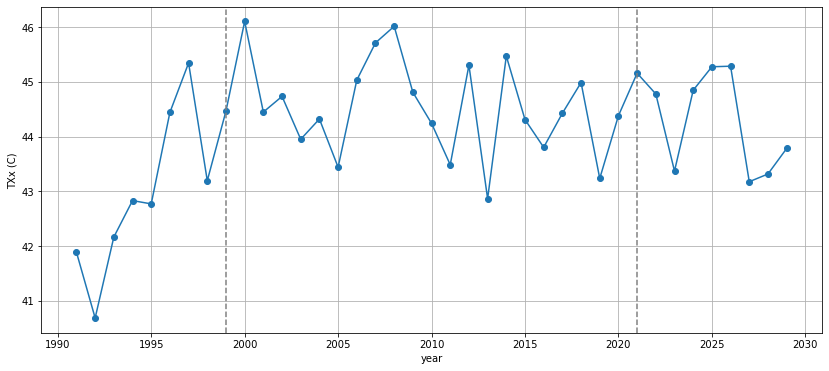

In [11]:
fig = plt.figure(figsize=[14, 6])

xvals = max_by_year['time'].dt.year.values
yvals = max_by_year.values
plt.plot(xvals, yvals, marker='o')
plt.axvline(1999, color='0.5', linestyle='--')
plt.axvline(2021, color='0.5', linestyle='--')
plt.xlabel('year')
plt.ylabel('TXx (C)')
plt.grid(True)
plt.show()

In [12]:
count = ds_time['tasmax'].notnull(keep_attrs=True)
count = count.sum(dim=('ensemble', 'init_date'), keep_attrs=True)
count = count.resample(time='A-DEC').sum('time', keep_attrs=True)

In [12]:
count['time'].values

array(['1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31

In [38]:
18 * 96

1728

In [12]:
count.values

array([ 192,  384,  576,  768,  960, 1152, 1344, 1536, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1536, 1344,
       1152,  960,  768,  576,  384,  192])

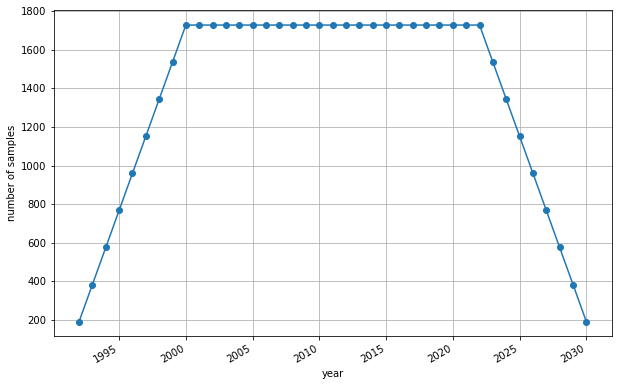

In [35]:
fig = plt.figure(figsize=[10, 6])
count.plot(marker='o')
plt.grid(True)
plt.ylabel('number of samples')
plt.xlabel('year')
plt.show()

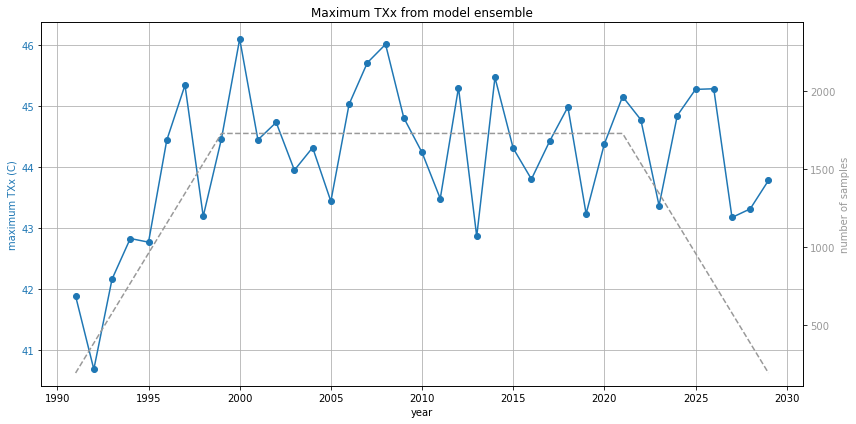

In [47]:
fig, ax1 = plt.subplots(figsize=[12, 6])

color = 'tab:blue'
xvals1 = max_by_year['time'].dt.year.values
yvals1 = max_by_year.values
ax1.set_xlabel('year')
ax1.set_ylabel('maximum TXx (C)', color=color)
ax1.plot(xvals1, yvals1, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx() 

color = '0.6'
xvals2 = count['time'].dt.year.values
yvals2 = count.values
ax2.set_ylabel('number of samples', color=color)
ax2.plot(xvals2, yvals2, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(110, 2440)

plt.title('Maximum TXx from model ensemble')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(f'/g/data/xv83/dbi599/seatac/maxTXx_by_year.pdf', bbox_inches='tight', facecolor='white')

In [39]:
yvals1[8:-8].mean()

44.551186

In [40]:
yvals1[8:-8]

array([44.46515 , 46.101166, 44.447266, 44.733154, 43.94992 , 44.320557,
       43.44034 , 45.030792, 45.71057 , 46.012848, 44.80829 , 44.240417,
       43.484314, 45.3031  , 42.864532, 45.469208, 44.309845, 43.802704,
       44.425385, 44.98523 , 43.235138, 44.380432, 45.15689 ],
      dtype=float32)

In [79]:
n_repeats = 1000
sample_size= 1000

estimates = {}
for year in np.arange(1999, 2022):
    print(year)
    estimates[year] = []
    for resample in range(n_repeats):
        year_da = ds_time['tasmax'].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
        year_array = year_da.to_masked_array().flatten().compressed()
        population_size = year_array.shape[0]
        random_indexes = np.random.choice(population_size, size=sample_size, replace=False)
        random_indexes.sort()
        txx = year_array[random_indexes].max()
        estimates[year].append(txx)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [80]:
df = pd.DataFrame.from_dict(estimates)
df

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,44.465149,44.580292,44.447266,44.733154,43.052002,44.320557,43.440338,45.030792,45.710571,46.012848,...,45.303101,42.864532,43.524872,42.441467,43.667877,44.354431,43.956848,43.235138,44.380432,44.150116
1,44.465149,46.101166,44.447266,44.733154,43.949921,42.784790,43.440338,45.030792,45.710571,43.437683,...,45.303101,42.814575,45.469208,44.309845,43.708832,44.257324,44.985229,43.235138,44.380432,45.156891
2,43.558655,46.101166,44.447266,44.733154,43.052002,44.320557,43.440338,45.030792,43.927063,46.012848,...,45.303101,42.864532,43.524872,44.309845,43.440613,44.354431,44.985229,43.235138,43.181091,44.845276
3,44.465149,46.101166,43.131897,44.380157,43.949921,43.740906,42.982483,42.394165,45.710571,46.012848,...,43.244690,42.864532,45.469208,42.441467,43.667877,44.425385,43.956848,43.235138,44.380432,45.156891
4,43.721649,44.580292,44.447266,44.733154,43.052002,44.320557,42.733185,42.624054,45.710571,46.012848,...,45.303101,42.864532,44.260254,43.955841,43.802704,44.354431,44.985229,43.235138,44.380432,44.585541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43.319427,44.580292,44.447266,44.733154,43.949921,43.740906,43.440338,45.030792,43.927063,46.012848,...,43.043579,42.864532,43.524872,44.309845,43.667877,44.257324,44.985229,43.235138,44.380432,45.156891
996,44.465149,46.101166,44.447266,44.733154,43.052002,43.740906,43.440338,45.030792,43.996185,43.799957,...,45.303101,42.814575,45.469208,43.955841,43.708832,44.425385,44.985229,43.235138,44.380432,45.067749
997,43.721649,43.522522,44.447266,43.492554,43.052002,44.320557,43.440338,45.030792,45.710571,45.571869,...,45.303101,42.864532,45.469208,44.309845,43.802704,44.354431,44.985229,43.235138,44.380432,45.156891
998,43.721649,44.580292,42.821014,44.733154,43.052002,44.320557,42.733185,45.030792,45.710571,46.012848,...,45.303101,42.864532,43.436951,44.309845,43.708832,44.425385,43.956848,43.235138,44.380432,45.156891


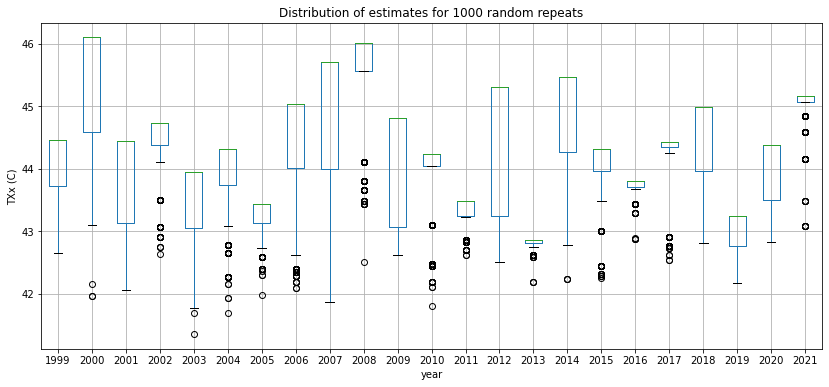

In [81]:
fig = plt.figure(figsize=[14, 6])
df.boxplot()
plt.title('Distribution of estimates for 1000 random repeats')
plt.xlabel('year')
plt.ylabel('TXx (C)')
#plt.savefig(f'/g/data/xv83/dbi599/seatac/tasmax_samples_seatac.pdf', bbox_inches='tight', facecolor='white')
plt.show()

In [28]:
18 * 96

1728

1728 samples for the year 1999
1728 samples for the year 2000
1728 samples for the year 2001
1728 samples for the year 2002
1728 samples for the year 2003
1728 samples for the year 2004
1728 samples for the year 2005
1728 samples for the year 2006
1728 samples for the year 2007
1728 samples for the year 2008
1728 samples for the year 2009
1728 samples for the year 2010
1728 samples for the year 2011
1728 samples for the year 2012
1728 samples for the year 2013
1728 samples for the year 2014
1728 samples for the year 2015
1728 samples for the year 2016
1728 samples for the year 2017
1728 samples for the year 2018
1728 samples for the year 2019
1728 samples for the year 2020
1728 samples for the year 2021


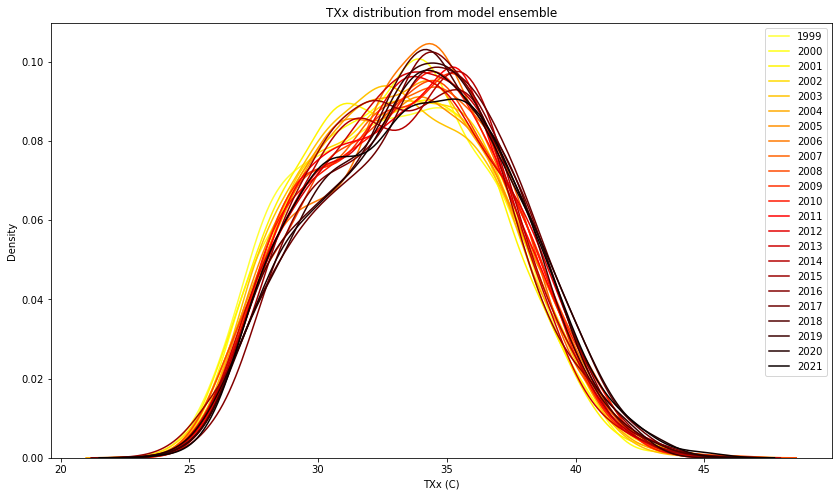

In [48]:
fig = plt.figure(figsize=[14, 8])

years = np.arange(1999, 2022)
color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, len(years))))
for year in years:
    c = next(color)
    year_da = ds_time['tasmax'].sel(time=slice(f'{year}-01-01', f'{year}-12-31'))
    year_array = year_da.to_masked_array().flatten().compressed()
#    n, bins, pathches = plt.hist(year_array, bins=np.arange(22.5, 47.5), histtype='step', label=str(year), color=c)
    nsamples = year_array.shape[0]
    print(f'{nsamples} samples for the year {year}')
    year_df = pd.DataFrame(year_array)
    sns.kdeplot(year_df[0], color=c, label=str(year))

plt.title('TXx distribution from model ensemble')
plt.xlabel('TXx (C)')
#plt.xlim(40, 48)
#plt.ylim(0, 0.02)
plt.legend()
plt.show()

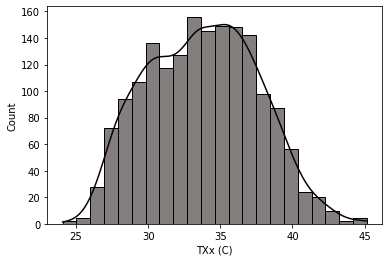

In [22]:
sns.histplot(year_df[0], color=c, label=str(year), kde=True)
plt.xlabel('TXx (C)')
plt.show()

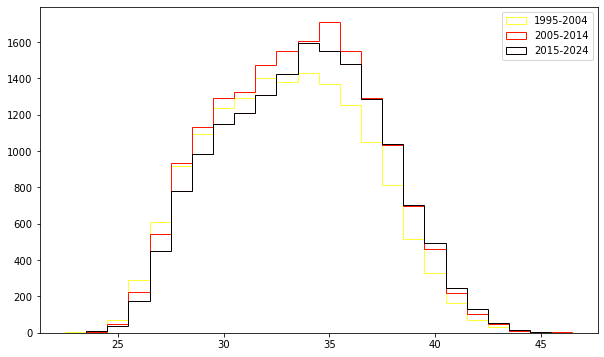

In [38]:
fig = plt.figure(figsize=[10, 6])

color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, 3)))
epochs = [['1995', '2004'], ['2005', '2014'], ['2015', '2024']]

for start, end in epochs:
    c = next(color)
    epoch_da = ds_time['tasmax'].sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    epoch_array = epoch_da.to_masked_array().flatten().compressed()
    n, bins, pathches = plt.hist(epoch_array, bins=np.arange(22.5, 47.5), histtype='step',
                                 label=f'{start}-{end}', color=c)

plt.legend()

In [40]:
data_dict = {}
epochs = [['2000', '2006'], ['2007', '2013'], ['2014', '2020']]
for start, end in epochs:
    epoch_da = ds_time['tasmax'].sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    epoch_array = epoch_da.to_masked_array().flatten().compressed()
    data_dict[f'{start}-{end}'] = epoch_array

data_df = pd.DataFrame.from_dict(data_dict)

In [41]:
data_df

,2000-2006,2007-2013,2014-2020
0,32.641541,32.133942,37.614655
1,38.162018,30.657990,28.598755
2,33.434052,28.932617,35.801849
3,26.146606,29.068146,29.108154
4,36.939636,37.948029,39.773834
...,...,...,...
12091,42.350708,36.038300,35.556580
12092,34.043671,38.135040,34.624390
12093,32.364471,33.782684,38.741119
12094,33.127838,41.805634,34.750519


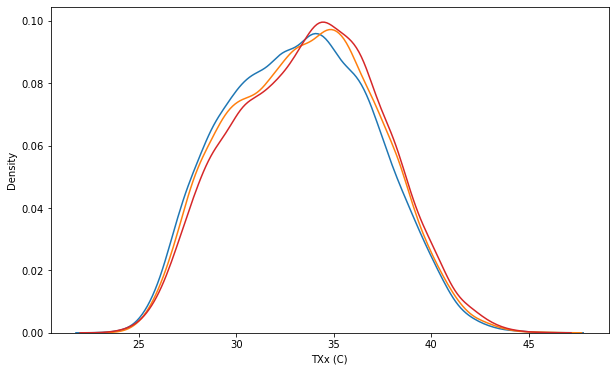

In [75]:
fig = plt.figure(figsize=[10, 6])
sns.kdeplot(data_df['2000-2006'], color='tab:blue')
sns.kdeplot(data_df['2007-2013'], color='tab:orange')
sns.kdeplot(data_df['2014-2020'], color='tab:red')
plt.xlabel('TXx (C)')
plt.show()

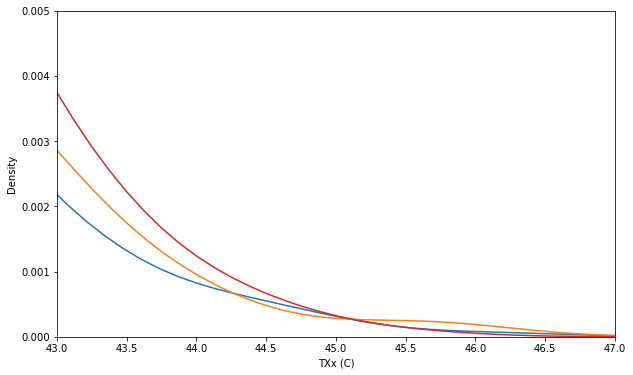

In [74]:
fig = plt.figure(figsize=[10, 6])
sns.kdeplot(data_df['2000-2006'], color='tab:blue')
sns.kdeplot(data_df['2007-2013'], color='tab:orange')
sns.kdeplot(data_df['2014-2020'], color='tab:red')
plt.xlabel('TXx (C)')
plt.ylim(0, 0.005)
plt.xlim(43, 47)
plt.show()

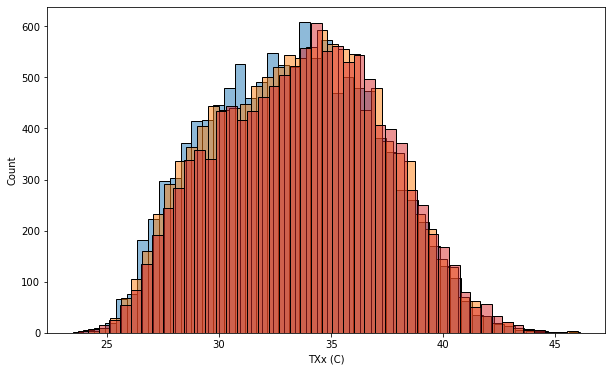

In [76]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(data_df['2000-2006'], color='tab:blue', kde=False, alpha=0.5)
sns.histplot(data_df['2007-2013'], color='tab:orange', kde=False, alpha=0.5)
sns.histplot(data_df['2014-2020'], color='tab:red', kde=False, alpha=0.5)
plt.xlabel('TXx (C)')
plt.show()

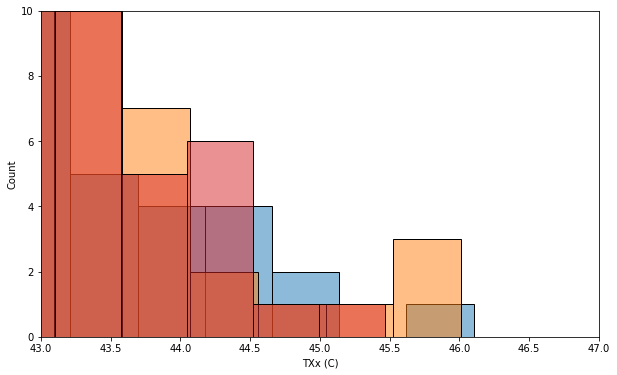

In [77]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(data_df['2000-2006'], color='tab:blue', kde=False, alpha=0.5)
sns.histplot(data_df['2007-2013'], color='tab:orange', kde=False, alpha=0.5)
sns.histplot(data_df['2014-2020'], color='tab:red', kde=False, alpha=0.5)
plt.xlabel('TXx (C)')
plt.ylim(0, 10)
plt.xlim(43, 47)
plt.show()

In [78]:
#sns.load_dataset('tips')

In [28]:
infiles = glob.glob('/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-??[9,0,1,2]*/atmos_isobaric_daily.zarr.zip')
infiles.sort()
infiles

['/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19900501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19901101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19910501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19911101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19920501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19921101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19930501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19931101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19940501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19941101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19950501/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19951101/atmos_isobaric_daily.zarr.zip',
 '/g/data/xv83/d

630720 samples for the year 1999
632448 samples for the year 2000
630720 samples for the year 2001
630720 samples for the year 2002
630720 samples for the year 2003
632448 samples for the year 2004
630720 samples for the year 2005
630720 samples for the year 2006
630720 samples for the year 2007
632448 samples for the year 2008
630720 samples for the year 2009
630720 samples for the year 2010
630720 samples for the year 2011
632448 samples for the year 2012
630720 samples for the year 2013
630720 samples for the year 2014
630720 samples for the year 2015
632448 samples for the year 2016
630720 samples for the year 2017
630720 samples for the year 2018
630720 samples for the year 2019
632448 samples for the year 2020
630720 samples for the year 2021


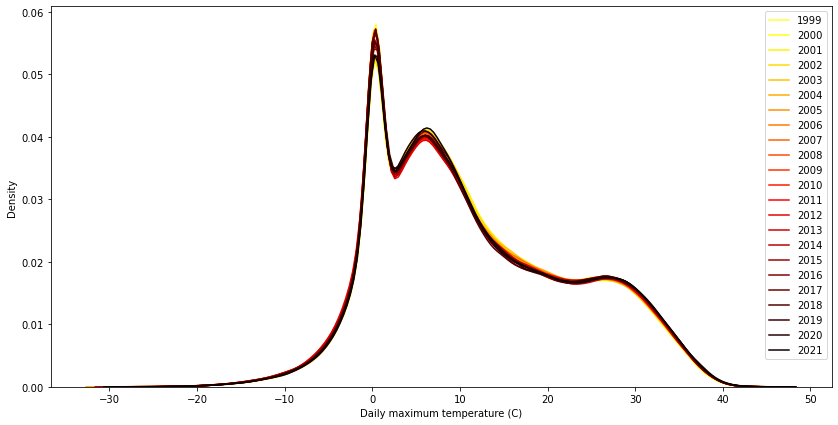

In [8]:
fig = plt.figure(figsize=[14, 7])

years = np.arange(1999, 2022)
color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, len(years))))
for year in years:
    year_array = np.array([])
    c = next(color)
    for infile in infiles:
        ds = fileio.open_file(infile,
                              metadata_file='../../config/dataset_cafe_daily.yml',
                              variables=['tasmax'],
                              spatial_coords=[47.45, -122.31],
                              units={'tasmax': 'C'},
                              sel={'time': slice(f'{year}-01-01', f'{year}-12-31')},
                             )
        ndays = ds['tasmax'].shape[0]
        if ndays > 364:
            year_array = np.append(year_array, ds['tasmax'].values.flatten())
    nsamples = year_array.shape[0]
    print(f'{nsamples} samples for the year {year}')
    year_df = pd.DataFrame(year_array)
    sns.kdeplot(year_df[0], color=c, label=str(year))

plt.legend()
plt.xlabel('Daily maximum temperature (C)')
plt.show()

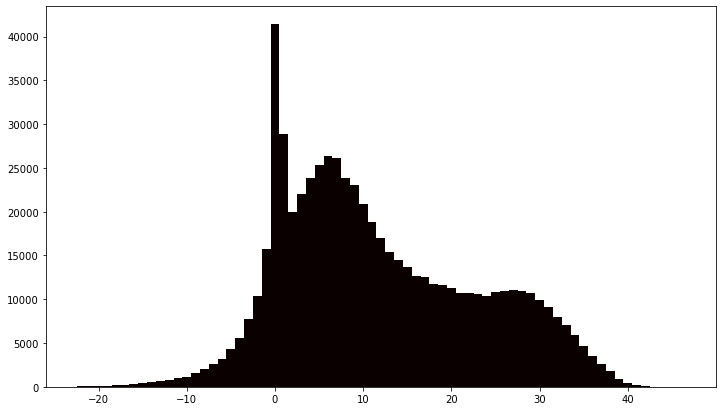

In [18]:
fig = plt.figure(figsize=[12, 7])
n, bins, pathches = plt.hist(year_array, label=str(year), color=c,
                             bins=np.arange(-22.5, 47.5))
plt.show()

In [ ]:
fig = plt.figure(figsize=[14, 7])

years = np.arange(1999, 2022)
color = iter(matplotlib.cm.hot_r(np.linspace(0.2, 1, len(years))))
for year in years:
    year_array = np.array([])
    c = next(color)
    for infile in infiles:
        ds = fileio.open_file(infile,
                              metadata_file='../../config/dataset_cafe_daily.yml',
                              variables=['tasmax'],
                              spatial_coords=[47.45, -122.31],
                              units={'tasmax': 'C'},
                              sel={'time': slice(f'{year}-01-01', f'{year}-12-31')},
                             )
        ndays = ds['tasmax'].shape[0]
        if ndays > 364:
            year_array = np.append(year_array, ds['tasmax'].values.flatten())
    nsamples = year_array.shape[0]
    print(f'{nsamples} samples for the year {year}')
    year_df = pd.DataFrame(year_array)
    sns.kdeplot(year_df[0], color=c, label=str(year))

plt.xlim(30, 48)
plt.ylim(0, 0.015)
plt.legend()
plt.xlabel('Daily maximum temperature (C)')
plt.show()

630720 samples for the year 1999
632448 samples for the year 2000
630720 samples for the year 2001
630720 samples for the year 2002
630720 samples for the year 2003
632448 samples for the year 2004
630720 samples for the year 2005
630720 samples for the year 2006
630720 samples for the year 2007
632448 samples for the year 2008
630720 samples for the year 2009
630720 samples for the year 2010
630720 samples for the year 2011
